In [1]:
import pandas as pd
import acquire as aqr
import prepare as prep
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
prepped_telco = prep.prep_telco()

In [3]:
prepped_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,monthly_contract,one_yr_contract,two_yr_contract,dsl,fiber,no_internet,bank_transfer,credit_card,electronic_check,mailed_check
0,0016-QLJIS,Female,0,1,1,65,1,1,1,1,...,0,0,1,1,0,0,0,0,0,1
1,0017-DINOC,Male,0,0,0,54,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
2,0019-GFNTW,Female,0,0,0,56,0,0,1,1,...,0,0,1,1,0,0,1,0,0,0
3,0056-EPFBG,Male,0,1,1,20,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
4,0078-XZMHT,Male,0,1,0,72,1,1,0,1,...,0,0,1,1,0,0,1,0,0,0


In [4]:
train, validate, test  = prep.split_telco(prepped_telco)

train_encoded, shape: (3943, 33)
validate_encoded, shape: (1691, 33)
test_encoded, shape: (1409, 33)


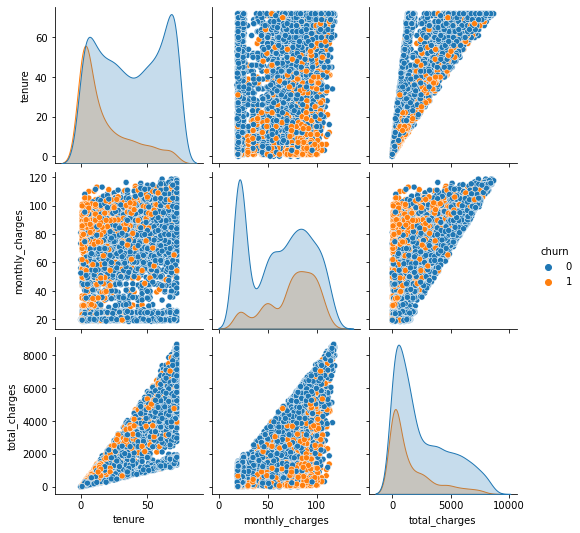

In [5]:
sns.pairplot(train[['churn','tenure','monthly_charges', 'total_charges']], hue='churn')


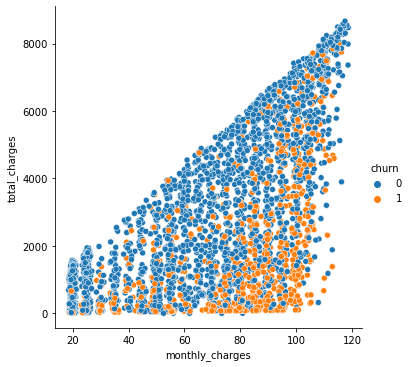

In [6]:
sns.relplot(x='monthly_charges', y ='total_charges', data = train, hue='churn', kind='scatter')

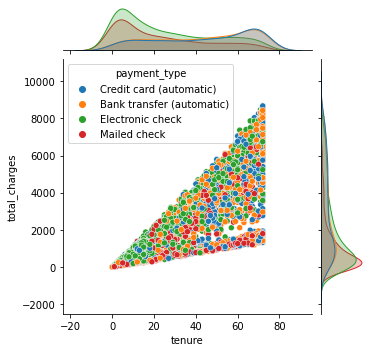

In [7]:
sns.jointplot(x="tenure", y="total_charges", data=train, hue='payment_type', kind='scatter', height=5)
plt.show()

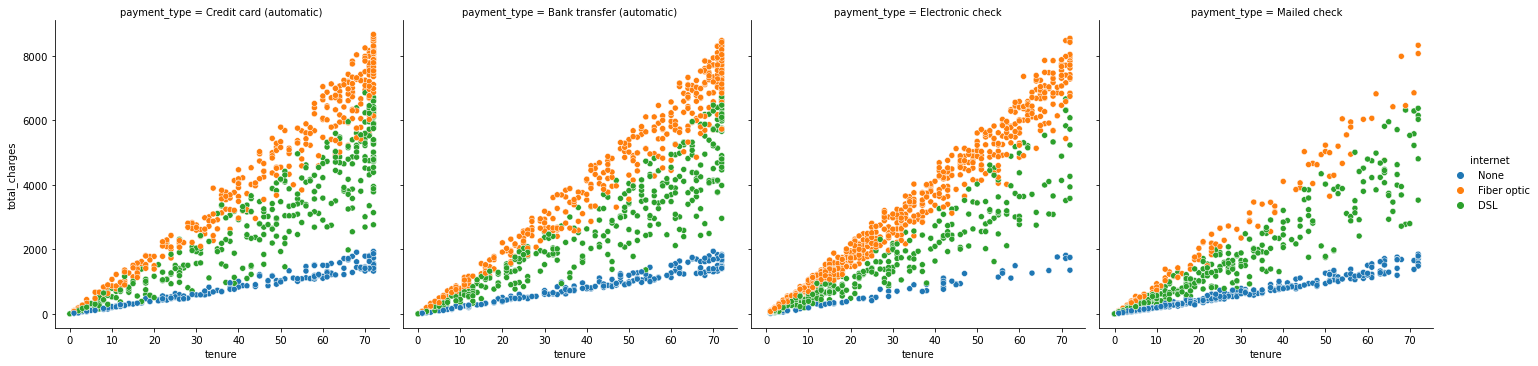

In [8]:
sns.relplot(x="tenure", y="total_charges", data=train, hue='internet', col='payment_type') # 

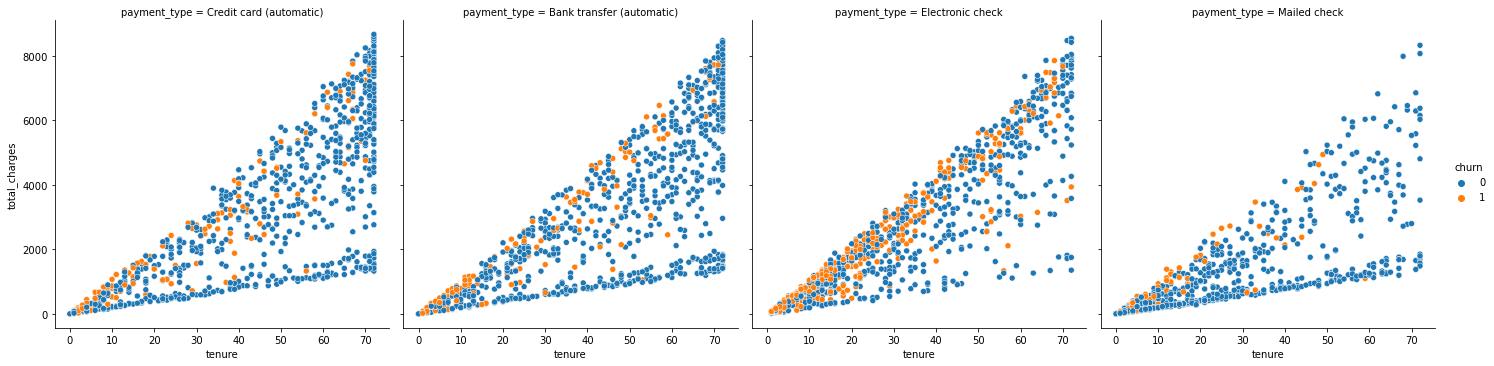

In [9]:
sns.relplot(x="tenure", y="total_charges", data=train, hue='churn', col='payment_type') # 

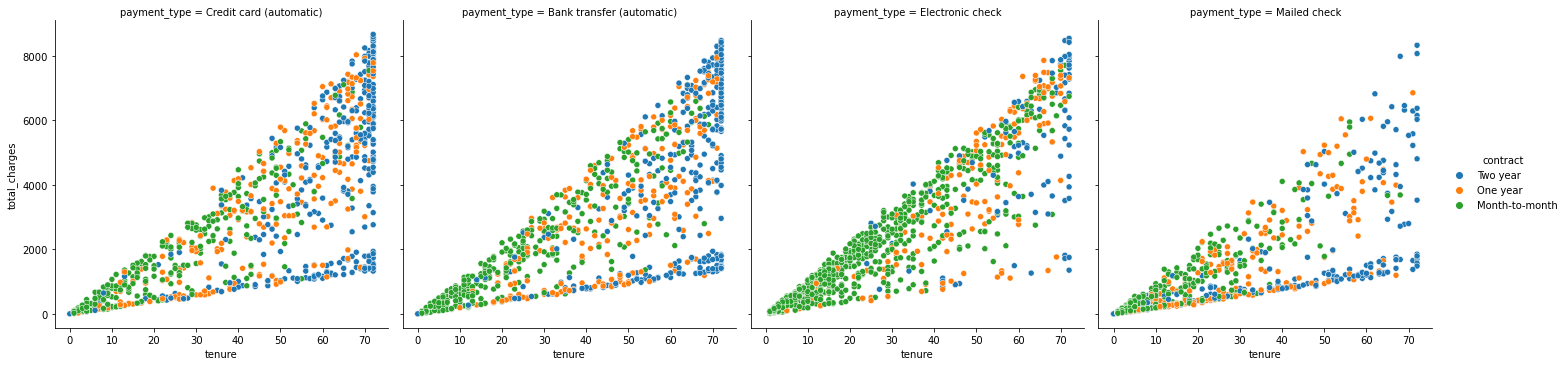

In [10]:
sns.relplot(x="tenure", y="total_charges", data=train, hue='contract', col='payment_type') # 

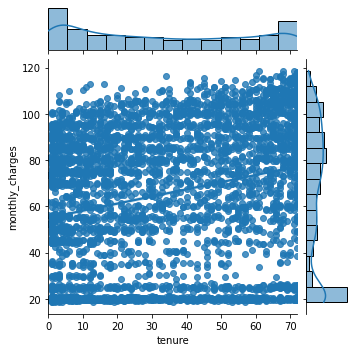

In [11]:
sns.jointplot(x="tenure", y="monthly_charges", data=train, kind='reg', height=5)
plt.show()

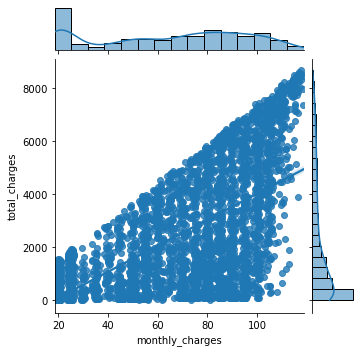

In [12]:
sns.jointplot(x="monthly_charges", y="total_charges", data=train, kind='reg', height=5)
plt.show()

In [13]:
train['months_to_years'] = train.tenure / 12

In [14]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,one_yr_contract,two_yr_contract,dsl,fiber,no_internet,bank_transfer,credit_card,electronic_check,mailed_check,months_to_years
5642,1982-FEBTD,Female,0,1,1,23,1,1,0,0,...,0,1,0,0,1,0,1,0,0,1.916667
3338,8982-NHAVY,Male,0,0,0,27,1,1,0,0,...,1,0,0,1,0,1,0,0,0,2.250000
4273,4115-NZRKS,Female,1,0,0,7,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0.583333
2382,9633-DENPU,Female,0,1,0,47,1,0,0,1,...,0,0,1,0,0,1,0,0,0,3.916667
2655,5693-PIPCS,Male,0,0,0,41,1,0,0,1,...,0,1,0,1,0,0,1,0,0,3.416667
